## groupby()


#### groupby()와 함께 사용하는 집계 메소드

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75)
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [2]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 
df.tail(20)

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
331,고속,호남선,안산,익산,202.0,244,2391,35.0
332,우등,호남선,안산,익산,202.0,184,2502,30.2
333,고속,호남선,시흥시화,광주,302.6,183,1567,30.6
334,우등,호남선,시흥시화,광주,302.6,5,153,68.0
335,고속,호남선,춘천,광주,406.5,122,1167,34.2
336,우등,호남선,대전복합,광주,178.6,1015,16872,59.4
337,고속,호남선,대전복합,광주,178.6,630,12766,45.0
338,우등,호남선,대전복합,전주,90.4,1944,44280,50.6
339,우등,호남선,대전시외,여수,225.4,66,1040,35.0
340,고속,호남선,천안,광주,210.5,765,10372,48.4


In [17]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수
dd= df.groupby('선별')
print(type(dd))
a = dd['선별'].count().sort_values(ascending = False)



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


선별
호남선    122
경부선    105
구마선     30
영동선     26
경인선     25
남해선     21
88선     18
동해선      4
Name: 선별, dtype: int64

In [69]:
%matplotlib inline

# 한글처리
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='Malgun Gothic')

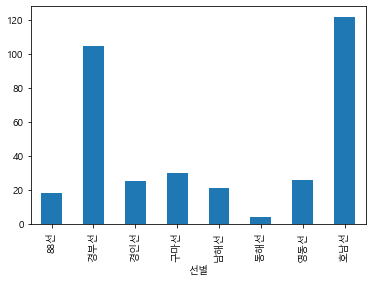

In [22]:
# 노선별 수에 대한 그래프
a.plot(kind = 'bar')

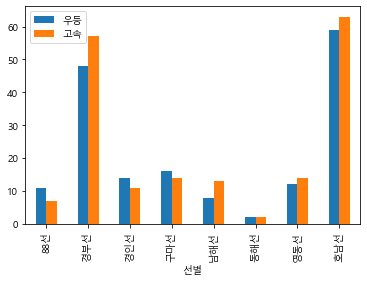

In [101]:
# 차종별, 노선별별 그룹화 작업 + 그래프

premium = df[df['차종'] == '우등'].groupby('선별').count()['총운행횟수']
express = df[df['차종'] == '고속'].groupby('선별').count()['총운행횟수']

result = pd.DataFrame({"선별":premium.index,"우등" :premium.values,"고속":express.values})
result.plot(x="선별",y=["우등","고속"],kind="bar")                      


In [67]:
# 총이용인원에 대한 평균
df['총이용인원'].mean()

11048.618233618234

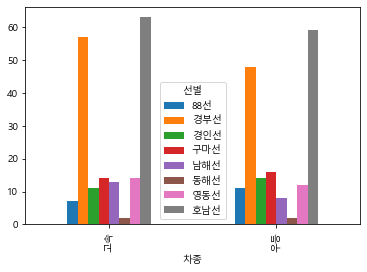

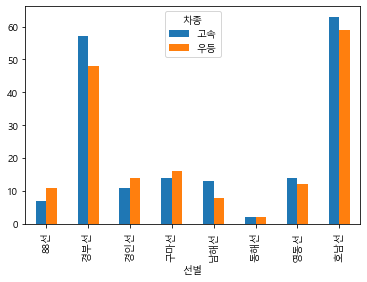

In [107]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사
result = pd.crosstab(df['차종'],df['선별'])
result2 = pd.crosstab(df['차종'],df['선별'],margins=True)
result.plot(kind = 'bar')

result = pd.crosstab(df['선별'],df['차종'])
result.plot(kind = 'bar')

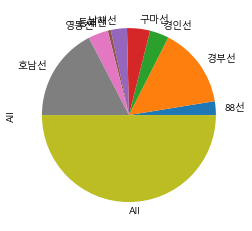

In [113]:
#'고속'에서 선별을 그래프 표현(원그래프(pie))

#result['고속'].plot(kind='pie')

#전체에서 선별을 그래프 표현.
result2.loc['All'].plot(kind='pie')


